# Simpson #
_Ejercicio 3_

In [1]:
function simpson(f,a,b,N) #definimos una función que pide como entradas una funcion, un inicio de intervalo, final y diviciones de este.
    x=linspace(a,b,N)  #Usando una función linspace damos una arreglo de valores iniciando en a y terminando en b dividido en N espacios.
    s=0  #comenzamos el valor de la integral en 0 

    
    for i in 1:N-1 #usamos un ciclo for que cambia los valores de nuestra aproximación al área 
        a=x[i]  #declaramos una a=x[i]  
        b=x[i+1]  #usamos una b=x[i+1] para representar el siguiente paso de a.
        
        s=s+(((b-a)/6)*(f(a)+4f((a+b)/2)+f(b)))
    end 
    return s # pedimos que devuelva el valor de la integral
end

simpson (generic function with 1 method)

In [2]:
simpson(x->x,1,10,120)


49.50000000000001

# Ejercicio 4:# 
Implementar método de interpolación de Lagrange en Julia. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el lugar donde evaluamos el polinomio, note que es particularmente útil si los inputs son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función plot recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: Interpolador(listx,listy,x).
Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 \pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.
Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.
Para los ejercicios anteriores evalue la función que interpola en una variable simbólica, para que nos permita ver la forma explicita del polinomio. Ej: Interpolador(listx,listy,Sym("x")).

In [3]:
using SymPy # llamamos a la paqueteria SymPy
X=Sym("X")# Definimos a x como una variable simbolica
function lagrange(xlist,ylist,X)
array=[]
array2=[]
array3=[]
total2=0
Pol=0
    
    for j in 1:length(xlist) #  for para realizar las multiplicación de la definicion de lagrage
       total=1 #Definimos total para inicialice de nuevo
        for m in 1:length(ylist) # for que varia el valor j
            if m!=j # si m es distinto de j entonces calculará la base
                base=(-xlist[m]+X)/ (xlist[j]-xlist[m]) # Definimos las bases
                total=base*total 
            end
        end
         push!(array,total)  # llenamos un arreglo con     
    end
    
    for i in 1:length(ylist)
        
        Pol= array[i]*ylist[i]
        total2= Pol+total2
    end
    total2=simplify(total2)
    return total2
end

lagrange (generic function with 1 method)

In [4]:
xlist=[0,2,3,4,5,6,7]
ylist=[10,-10,-4,0,5,20,-1]
lagrange(xlist,ylist,X)

       6        5         4         3          2            
  173*X    113*X    4957*X    2731*X    54571*X    83*X     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

In [5]:
using PyPlot

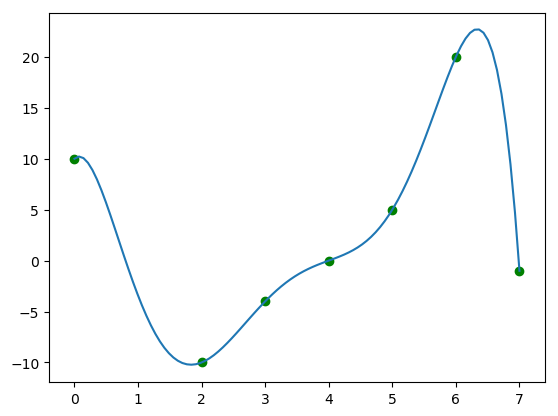

PyObject <matplotlib.collections.PathCollection object at 0x0000000026C6E048>

In [6]:
y = simplify(lagrange(xlist,ylist,X))
x2 = linspace(0,7,100)
y2=y.(x2)
plot(x2,y2)
scatter(xlist,ylist,color="green")

# Interpolación de los puntos (0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1).


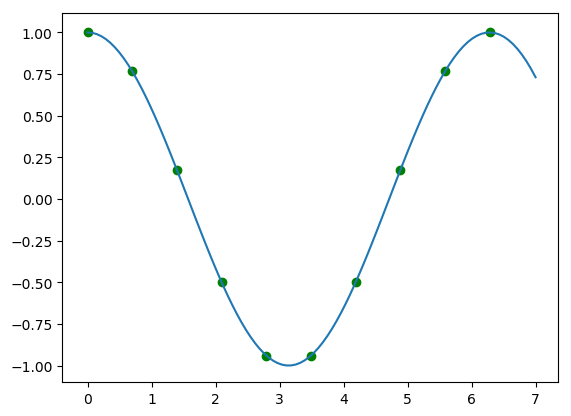

PyObject <matplotlib.collections.PathCollection object at 0x0000000029C58940>

In [11]:
# Para el coseno
a=linspace(0,2pi,10)
b= cos.(segment)
lagrange(segment,segment2,X)
y = simplify(lagrange(a,b,X))
x2 = linspace(0,7,100)
y2=y.(x2)
plot(x2,y2)
scatter(a,b,color="green")


# Interpolación de la función $\cos(x)$ en 10 puntos uniformemente distribuidos en $[0,2\pi]$.

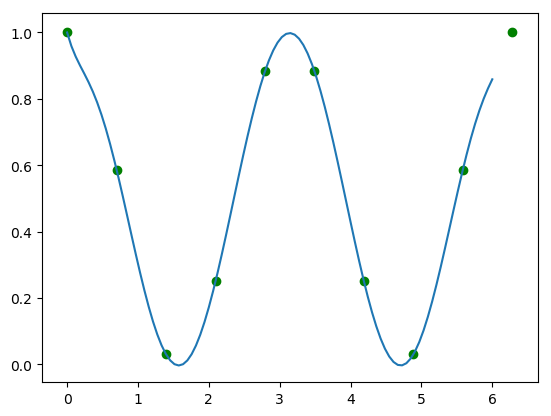

PyObject <matplotlib.collections.PathCollection object at 0x00000000228EF7B8>

In [12]:
# Para el cos²(x)
c=linspace(0,2pi,10)
d= (cos.(a)).*(cos.(a))
lagrange(c,d,X)
y = simplify(lagrange(c,d,X))
x2 = linspace(0,6,100)
y2=y.(x2)
plot(x2,y2)
scatter(c,d,color="green")


# Interpolación de la función $\cos^{2}(x)$ en 10 puntos uniformemente distribuidos en $[0,2\pi]$.

# Ejercicio 5: 
Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

In [13]:
function riemann(f,a,b,N)
    list = linspace(a,b,N)
    I = 0
    for i in 1:N-1
        a = list[i]
        b = list[i+1]
        I += (b-a)*f((a+b)/2)
    end
    return I
end;
function trapecio(f,a,b,N)
    list = linspace(a,b,N)
    I = 0
    for i in 1:N-1
        a = list[i]
        b = list[i+1]
        I += (b-a)*(f(a)+f(b))/2
    end
    return I
end

trapecio (generic function with 1 method)

In [23]:
f(x)=-sin(x)

f (generic function with 1 method)

In [33]:
#g(x)=-2 solución de la integral del -sin(X) de [0,pi]
 exacta=-2

-2

In [34]:
function compara(f,method,a,b,exacta)
    list=[];
       for i in 2:10
        push!(list,method(f,a,b,i))
    end
    return abs.((list-exacta)/exacta);
end;

In [35]:
t= compara(f,riemann,0,pi,exacta);
w = compara(f,trapecio,0,pi,exacta);
h = compara(f,simpson,0,pi,exacta);

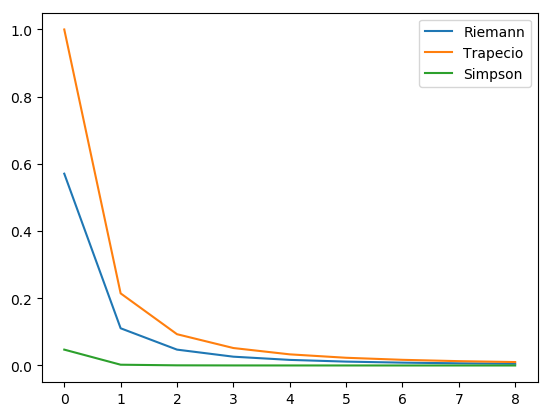

In [36]:
plot(t,label="Riemann")
plot(w,label="Trapecio")
plot(h,label="Simpson")
legend()
show()